# Heart Failure Prediction

- Context
- Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

- People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.



##### Attribute Information
- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or - ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

In [2]:
# loading the dataset
df = pd.read_csv("heart_prediction_data.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.shape

(918, 12)

- There are 918 rows and 12 columns in our dataset

In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


- There are no outliers in our dataset 

In [6]:
#checking null values
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

##### Dataset dont have any missing values

# Visualization

In [7]:
def plot_bar_heart_disease(df,col,target,title,color="g"):
    plt.style.use("seaborn-whitegrid")
    xcol = df[col].unique()
    ycol = []
    for val in xcol:
        ycol.append(df[col].loc[(df[col]==val) & (df[target]==1)].count())
    fig, ax = plt.subplots(figsize=(10,8))
    ax.bar(xcol,ycol,color=color)
    ax.set(title=title,xlabel=col,ylabel=target);

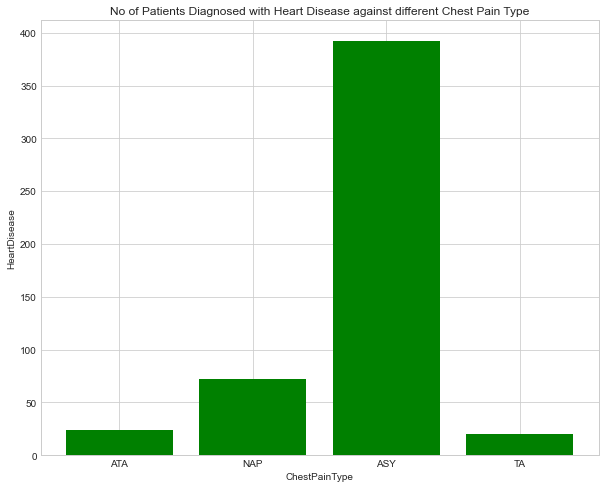

In [8]:
plot_bar_heart_disease(df,"ChestPainType","HeartDisease","No of Patients Diagnosed with Heart Disease against different Chest Pain Type")

##### Chest Pain Type patients diagnosed with highest no of heart disease

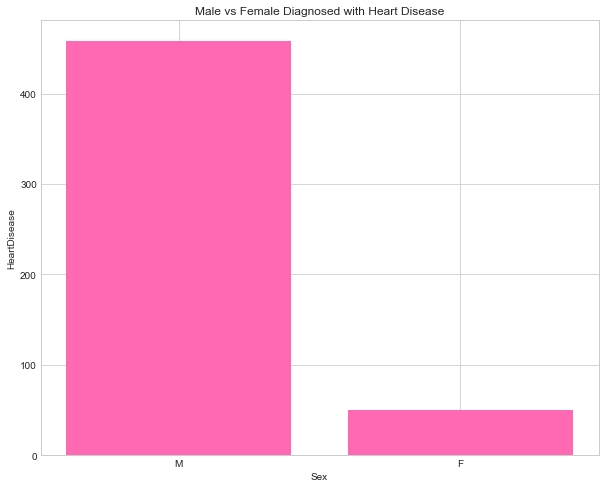

In [9]:
plot_bar_heart_disease(df,"Sex","HeartDisease","Male vs Female Diagnosed with Heart Disease","hotpink")

#### Males Diagnosed with Heart Disease way higher than Females

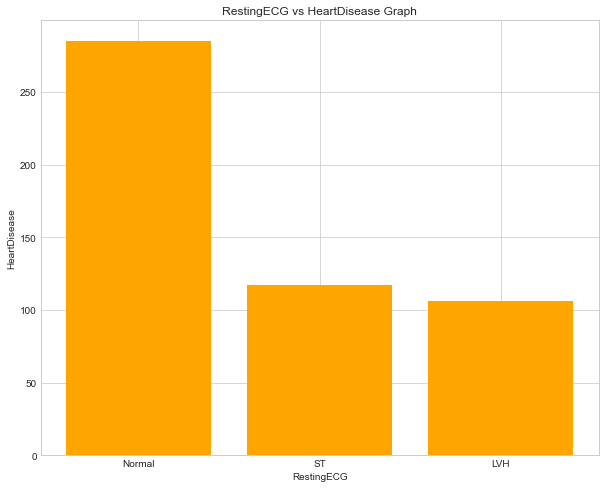

In [10]:
plot_bar_heart_disease(df,"RestingECG","HeartDisease","RestingECG vs HeartDisease Graph","orange")

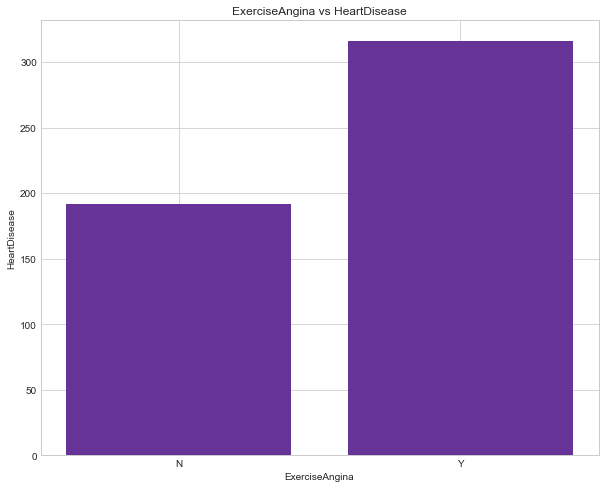

In [11]:
plot_bar_heart_disease(df,"ExerciseAngina","HeartDisease","ExerciseAngina vs HeartDisease","rebeccapurple")

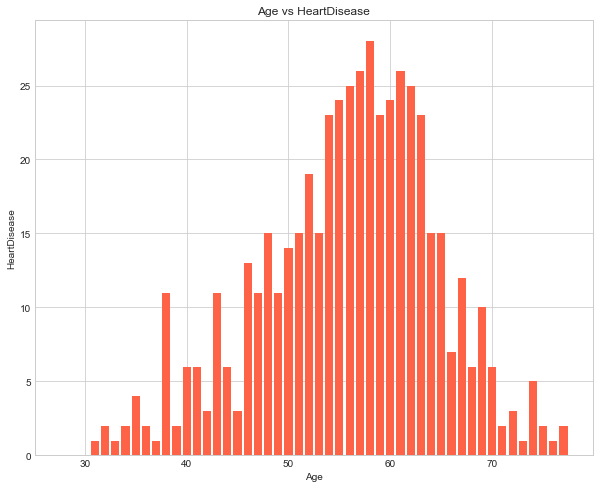

In [12]:
plot_bar_heart_disease(df,"Age","HeartDisease","Age vs HeartDisease","tomato")

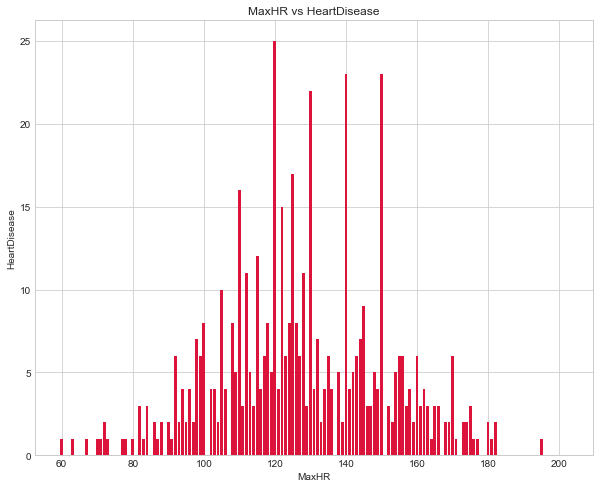

In [13]:
plot_bar_heart_disease(df,"MaxHR","HeartDisease","MaxHR vs HeartDisease","crimson")

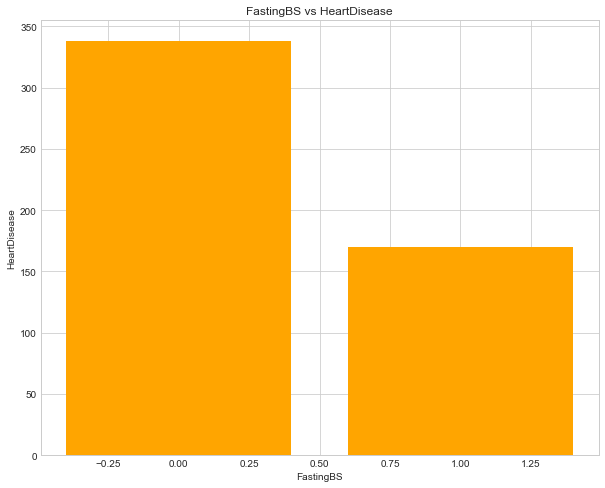

In [14]:
plot_bar_heart_disease(df,"FastingBS","HeartDisease", "FastingBS vs HeartDisease", "orange")

In [15]:
def plot_scatter_heart_disease(df,col1,col2,target,cmap):
    fig, ax = plt.subplots(figsize=(10,8))
    scatter = ax.scatter(df[col1],df[col2],c=df[target],cmap=cmap)
    ax.set(title=(col1+ " vs "+col2),xlabel = col1, ylabel = col2)
    ax.legend(*scatter.legend_elements(), title=target);

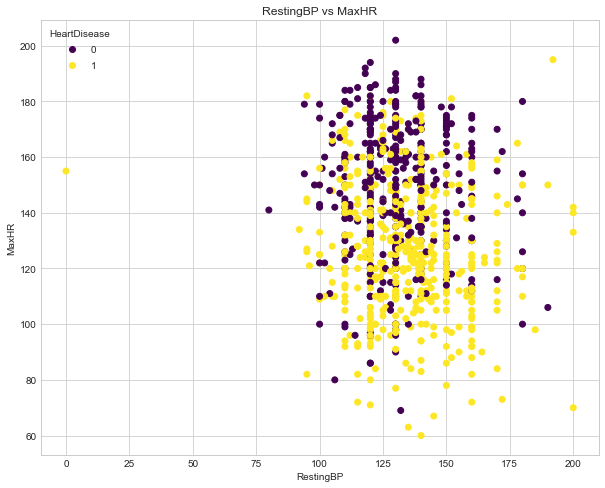

In [16]:
plot_scatter_heart_disease(df,"RestingBP", "MaxHR", "HeartDisease", "viridis")

##### Person having heart_disease is shown by yellow dots and not having is deonted by purple

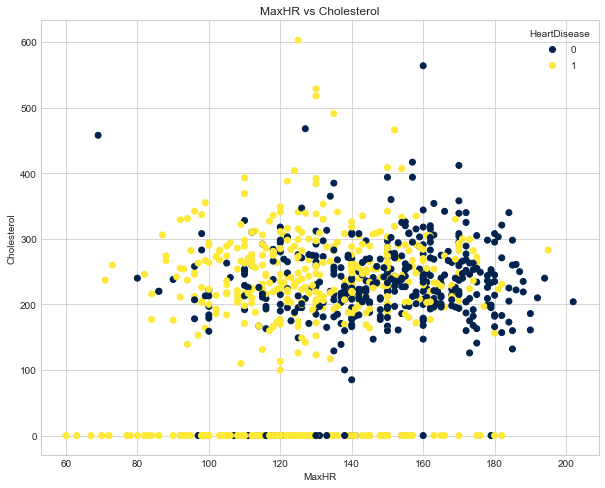

In [17]:
plot_scatter_heart_disease(df,"MaxHR","Cholesterol","HeartDisease","cividis")

##### From the scatter plots, one thing we observed, in RestingBP and Cholesterol column some values are 0

In [18]:
df["Cholesterol"].loc[df["Cholesterol"]==0].count()

172

In [19]:
df["RestingBP"].loc[df["RestingBP"]==0].count()

1

#### Our conclusion upto this point is we need to convert those column containing strings to categories and scale those columns which contains outliers

## Feature Engineering

In [20]:
#split our independent and dependent features
X = df.drop(columns=["HeartDisease"])
y = df["HeartDisease"]

#encoder to turn objects into categories
one_hot = OneHotEncoder(handle_unknown="ignore")
cat_features = ["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]

#scaler
scaler = MinMaxScaler()
scale_features = ["Age","RestingBP","Cholesterol","MaxHR"]

#transformer
transformer = ColumnTransformer([
    ("one_hot",one_hot,cat_features),
    ("scaler",scaler,scale_features)
])

X_transform = transformer.fit_transform(X)

In [21]:
#splitting our data set into train_test set
X_train,X_test,y_train,y_test = train_test_split(X_transform,y,test_size=0.2)

## Choosing the right estimator and training our dataset

# importing our model
## Random Forest 


In [22]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=200,max_depth=15,max_features='sqrt',min_samples_leaf=4,min_samples_split=2)

In [23]:
#training our dataset
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, max_features='sqrt', min_samples_leaf=4,
                       n_estimators=200)

In [24]:
clf.score(X_test,y_test)

0.8967391304347826

#### Evaluation

In [25]:
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score,confusion_matrix,roc_auc_score,roc_curve,classification_report 

#prediction values

y_preds = clf.predict(X_test)
y_preds

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [26]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88        78
           1       0.91      0.92      0.91       106

    accuracy                           0.90       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184



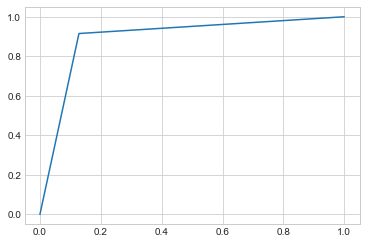

In [27]:
fpr, tpr, thresholds = roc_curve(y_test,y_preds)

plt.plot(fpr,tpr);

## Logistic Regression 

In [28]:
from sklearn.linear_model import LogisticRegression
LGR = LogisticRegression(solver='liblinear',C=0.1)
LGR.fit(X_train,y_train)
print (classification_report(y_test,LGR.predict(X_test)))


              precision    recall  f1-score   support

           0       0.86      0.85      0.85        78
           1       0.89      0.90      0.89       106

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184



## Support Vector Machine

In [29]:
from sklearn.svm import SVC
clf_SVM=SVC(C=1000,kernel='rbf',degree=5)
clf_SVM.fit(X_train,y_train)
print (classification_report(y_test,clf_SVM.predict(X_test)))


              precision    recall  f1-score   support

           0       0.74      0.79      0.77        78
           1       0.84      0.79      0.82       106

    accuracy                           0.79       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.80      0.79      0.79       184



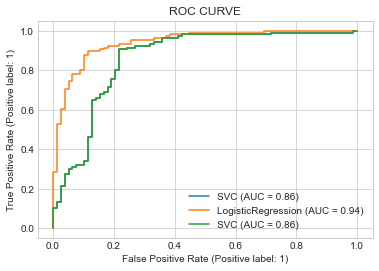

In [30]:
from sklearn.metrics import plot_roc_curve
fig=plot_roc_curve(clf_SVM,X_test,y_test)
fig=plot_roc_curve(LGR,X_test,y_test,ax=fig.ax_)
fig=plot_roc_curve(clf_SVM,X_test,y_test,ax=fig.ax_)
plt.title("ROC CURVE")
plt.show()

## Adaboost Classifier 

In [31]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier( n_estimators=100, learning_rate=0.2, random_state=29)
abcl = abcl.fit(X_train, y_train)
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)

print(acc_AB)
print (classification_report(y_test,pred_AB))

0.8804347826086957
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        78
           1       0.90      0.90      0.90       106

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



## KNN 

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
knn = KNeighborsClassifier(n_neighbors=15)
    
    # fitting the model
knn.fit(X_train, y_train)
    
    # predict the response\n",
y_pred = knn.predict(X_test)

    # evaluate accuracy\n",
print(accuracy_score(y_test, y_pred))
print (classification_report(y_test,y_pred))

0.875
              precision    recall  f1-score   support

           0       0.85      0.86      0.85        78
           1       0.90      0.89      0.89       106

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



In [33]:
compare_metrics_df ={"Algorithm":['Logistic Regression','AdaBoost','K-NearestNeighbors','Random Forest','SVM',], 
                                  "Accuracy":[0.86,0.87,0.83,0.88,0.84],
                                  "Precision":[0.83,0.88,0.80,0.91,0.84],
                                  "Recall":[0.85,0.81,0.80,0.80,0.79],
                                  "F1-score":[0.84,0.84,0.80,0.85,0.81]}

In [34]:
final=pd.DataFrame(compare_metrics_df).sort_values("Accuracy",ascending=False)
final

,Algorithm,Accuracy,Precision,Recall,F1-score
3,Random Forest,0.88,0.91,0.80,0.85
1,AdaBoost,0.87,0.88,0.81,0.84
0,Logistic Regression,0.86,0.83,0.85,0.84
4,SVM,0.84,0.84,0.79,0.81
2,K-NearestNeighbors,0.83,0.80,0.80,0.80


Text(0, 0.5, 'Classification_report')

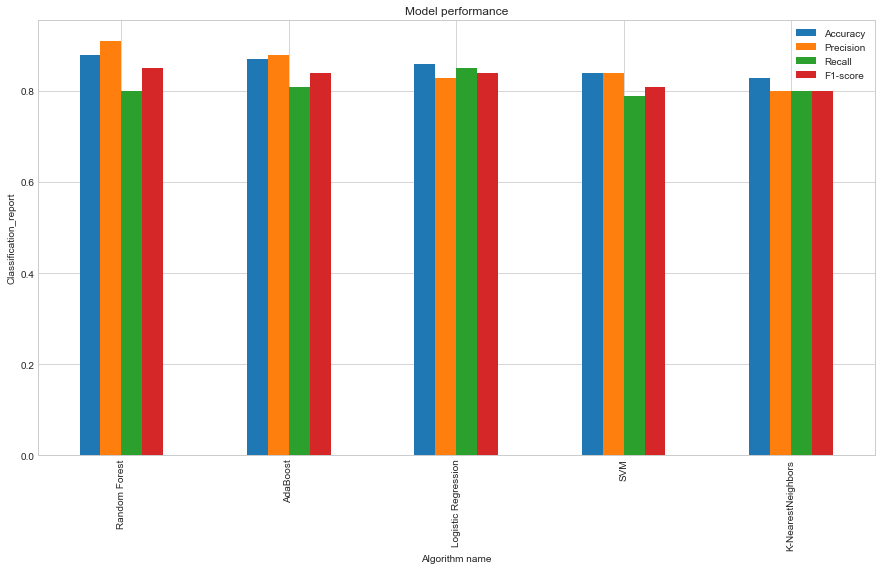

In [35]:
final.plot(kind="bar",x="Algorithm",figsize=(15,8))
plt.title("Model performance")
plt.xlabel("Algorithm name")
plt.ylabel("Classification_report")

### Precision for Random forest is high but for KNN its not good

###### Conclusion:
- Random forest with hyperparameter is giving the highest accuracy i.e. 91 but SVM & AdaBoost is minimum for it so next model which is showing highest accuracy is Random Forest with hyperparameter which is 91 as well as  SVM & AdaBoost is also high.It satifies all the the requirement so we will consider Random Forest with hyperparameter as best model.
- logistic regression, SVM and AdaBoost without hyperparameter are showing almost same result